# Imports

In [1]:
import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data import

In [2]:
df = pd.read_csv("data/covid/france/hospitalisations/donnees-hospitalieres-nouveaux-covid19-2020-05-05-19h00.csv", sep=";")

# data exploration

In [3]:
df.head()

,dep,jour,incid_hosp,incid_rea,incid_dc,incid_rad
0,01,2020-03-19,1,0,0,0
1,01,2020-03-20,0,0,0,1
2,01,2020-03-21,4,0,0,0
3,01,2020-03-22,3,1,0,1
4,01,2020-03-23,14,1,0,5


In [4]:
df.describe()

,incid_hosp,incid_rea,incid_dc,incid_rad
count,4848.000000,4848.000000,4848.000000,4848.000000
mean,20.315594,3.360561,3.366543,11.370256
std,37.242776,7.317461,6.628951,20.116980
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000
50%,7.000000,1.000000,1.000000,4.000000
75%,20.000000,3.000000,3.000000,12.000000
max,410.000000,95.000000,72.000000,193.000000


In [5]:
df.columns

Index(['dep', 'jour', 'incid_hosp', 'incid_rea', 'incid_dc', 'incid_rad'], dtype='object')

In [6]:
df.dtypes

dep           object
jour          object
incid_hosp     int64
incid_rea      int64
incid_dc       int64
incid_rad      int64
dtype: object

Il sera intéressant pour la suite d'avoir des datetime pour les jour au lieu de simple string.

In [7]:
df["jour"] = pd.to_datetime(df["jour"])

## des plots

Contrairement au jeu de données hospitalisations, on obtient ici seulement le nombre de nouveaux cas.

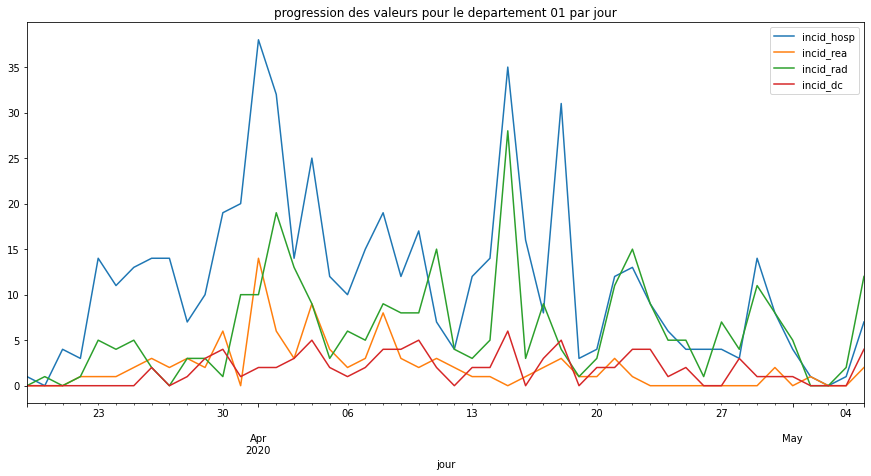

In [11]:
fig, ax = plt.subplots()

fig.set_size_inches(15,7)

tmp = df[df["dep"] == "01"]
tmp[["jour", "incid_hosp"]].pivot_table(index="jour").plot(ax=ax)
tmp[["jour", "incid_rea"]].pivot_table(index="jour").plot(ax=ax)
tmp[["jour", "incid_rad"]].pivot_table(index="jour").plot(ax=ax)
tmp[["jour", "incid_dc"]].pivot_table(index="jour").plot(ax=ax)

plt.title("progression des valeurs pour le departement 01 par jour")
plt.show()